# NOME : PEDRO HENRIQUE BUENO RIEBIRO
# NUSP: 14670752

# SME0823 - Modelos de Regressão e Aprendizado Supervisionado II



### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.
Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

## Leitura com base no NUSP final 2

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze2.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,78,0,0,0,32.0,81.085959
1,8,0,0,0,41.0,53.888183
2,34,0,0,1,39.0,92.455084
3,7,0,0,0,56.0,41.246594
4,8,0,0,0,36.0,91.036921
...,...,...,...,...,...,...
1395,10,1,0,0,53.0,57.794915
1396,11,1,0,0,58.0,59.585500
1397,9,0,0,0,36.0,29.955485
1398,18,1,1,0,47.0,63.221483


In [31]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


# 1. Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [32]:
print(df.describe())

           nsneeze      alcohol     antihist       smoker          age  \
count  1400.000000  1400.000000  1400.000000  1400.000000  1400.000000   
mean     23.425000     0.259286     0.202143     0.192857    40.550714   
std      49.201546     0.438399     0.401742     0.394683    13.589310   
min       0.000000     0.000000     0.000000     0.000000    18.000000   
25%       6.000000     0.000000     0.000000     0.000000    30.750000   
50%      12.000000     0.000000     0.000000     0.000000    40.000000   
75%      22.000000     1.000000     0.000000     0.000000    49.000000   
max     940.000000     1.000000     1.000000     1.000000    80.000000   

            pollen  
count  1400.000000  
mean     58.687196  
std      29.748564  
min       6.576282  
25%      37.643987  
50%      53.852482  
75%      73.818962  
max     202.922690  


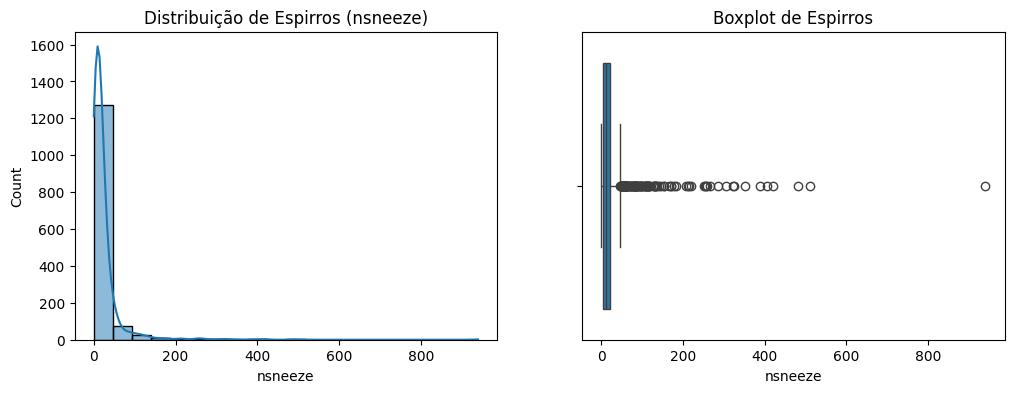

In [33]:
# 2. Visualização da Variável Resposta
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['nsneeze'], kde=True, bins=20)
plt.title('Distribuição de Espirros (nsneeze)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['nsneeze'])
plt.title('Boxplot de Espirros')
plt.show()



Obs sobre a variavel resposta:
Nsneeze: É uma variável de contagem, assimétrica à direita (cauda longa), o que sugere que um modelo de contagem é adequado. A variância parece ser muito maior que a média, indicando possível superdispersão.

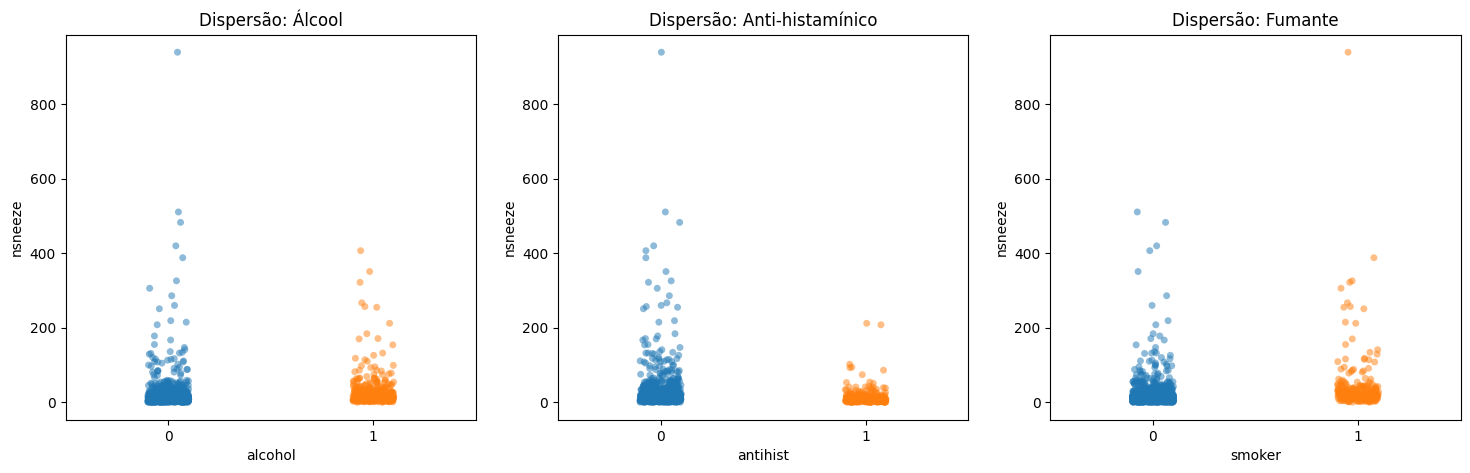

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Adicionamos alpha=0.5 para transparência, ajudando a ver a densidade
sns.stripplot(x='alcohol', y='nsneeze', data=df, ax=axes[0], jitter=True, alpha=0.5, hue='alcohol', legend=False)
axes[0].set_title('Dispersão: Álcool')

sns.stripplot(x='antihist', y='nsneeze', data=df, ax=axes[1], jitter=True, alpha=0.5, hue='antihist', legend=False)
axes[1].set_title('Dispersão: Anti-histamínico')

sns.stripplot(x='smoker', y='nsneeze', data=df, ax=axes[2], jitter=True, alpha=0.5, hue='smoker', legend=False)
axes[2].set_title('Dispersão: Fumante')

plt.show()

Álcool: Parece haver uma mediana de espirros maior para quem consome álcool (1).

Anti-histamínico: Quem toma o remédio (1) tende a ter consideravelmente menos espirros.

Fumante: Fumantes parecem ter uma contagem de espirros ligeiramente maior.

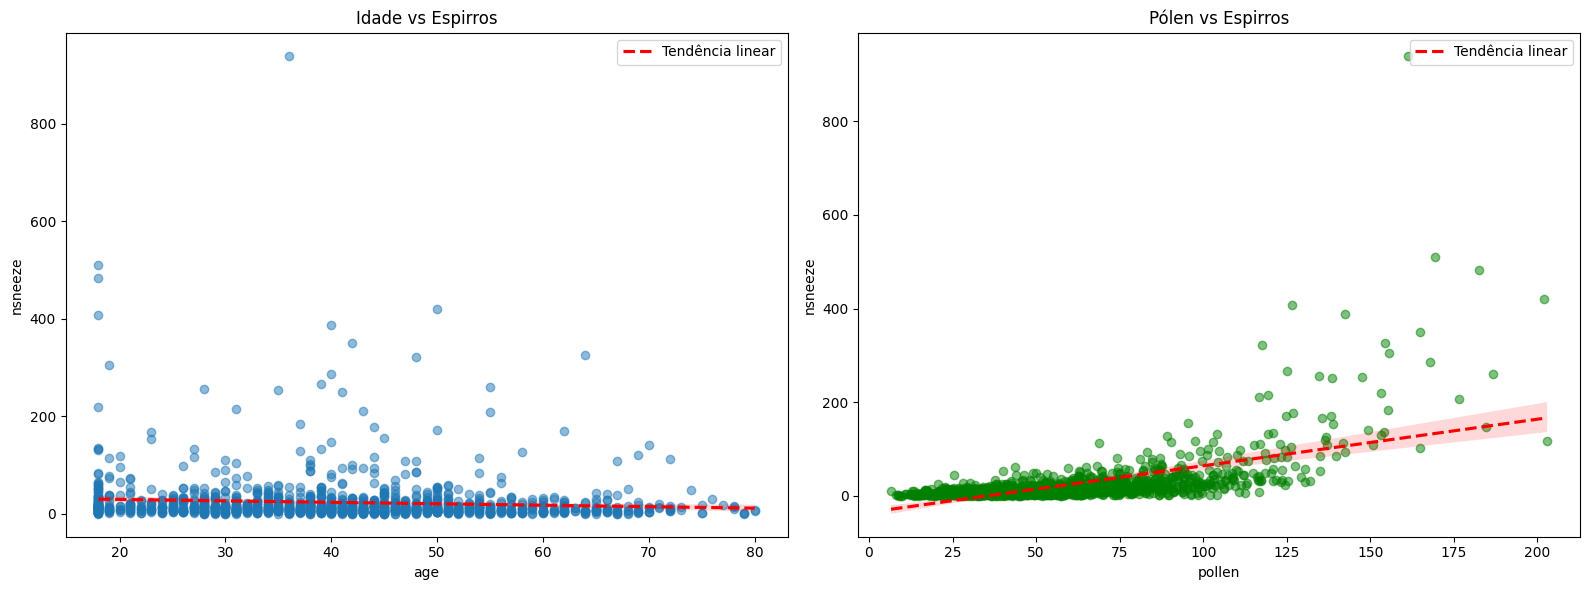

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Gráfico 1: Idade vs Espirros ---
sns.regplot(
    x='age', 
    y='nsneeze', 
    data=df, 
    ax=axes[0],
    color='tab:blue', 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'red', 'linestyle': '--', 'label': 'Tendência linear'}
)
axes[0].set_title('Idade vs Espirros')
axes[0].legend()

# --- Gráfico 2: Pólen vs Espirros ---
sns.regplot(
    x='pollen', 
    y='nsneeze', 
    data=df, 
    ax=axes[1],
    color='green', 
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red', 'linestyle': '--', 'label': 'Tendência linear'}
)
axes[1].set_title('Pólen vs Espirros')
axes[1].legend()

plt.tight_layout()
plt.show()

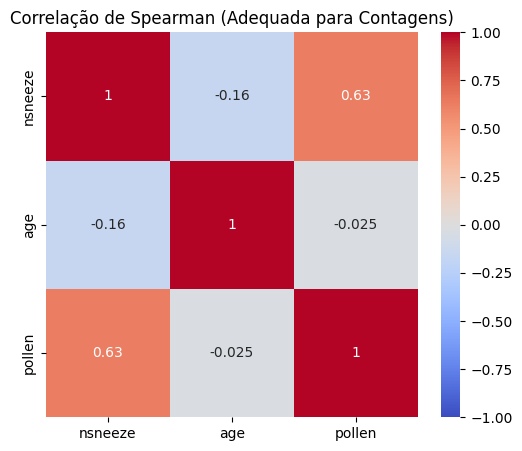

In [36]:
# Selecionando apenas as numéricas
vars_num = df[['nsneeze', 'age', 'pollen']]
# 2. Correlação de Spearman (Monotônica - Recomendada)
corr_spearman = vars_num.corr(method='spearman')
# Visualização com Heatmap (Usando Spearman)
plt.figure(figsize=(6, 5))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação de Spearman (Adequada para Contagens)')
plt.show()

Pólen: Há uma relação linear positiva clara; quanto maior a concentração de pólen, maior o número de espirros.

Idade: A relação visual é menos óbvia, mas pode haver uma leve tendência de queda com a idade.

# 2. Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [37]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [38]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [39]:
# 2. Ajuste do Modelo de Poisson
# Usamos C() para indicar explicitamente ao Python que são variáveis categóricas (0 ou 1)
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# Criando e ajustando o modelo (GLM com família Poisson)
modelo_poisson = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()

# Apresentando os resultados
print(modelo_poisson.summary())

# Dica: Para facilitar a interpretação, vamos calcular a exponencial dos coeficientes
# (Razão de Taxas / Rate Ratio)
print("\n--- Interpretação (Razão de Taxas: e^coef) ---")
params = modelo_poisson.params
conf = modelo_poisson.conf_int()
conf['Razão de Taxas (Mean)'] = params
conf.columns = ['2.5%', '97.5%', 'Razão de Taxas (Mean)']
print(np.exp(conf))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1400
Model:                            GLM   Df Residuals:                     1394
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8511.6
Date:                Mon, 01 Dec 2025   Deviance:                       11077.
Time:                        22:27:38   Pearson chi2:                 1.15e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5028      0.021  

## Analise

Todas as variáveis explicativas (alcohol, antihist, smoker, age e pollen) apresentaram p-valor (P>|z|) igual a 0.000. Portanto, ao nível de 5% de significância, todas as variáveis são estatisticamente relevantes para explicar o número de espirros.

### 2. Interpretação dos Coeficientes (Modelo de Poisson)

* **Álcool** (`C(alcohol)[T.1]`):
    * **Razão de Taxas:** 1.38
    * **Interpretação:** Indivíduos que consumiram álcool apresentaram uma taxa média de espirros **38% maior** do que aqueles que não consumiram ($1.38 - 1 = 0.38$), mantendo as demais variáveis constantes.

* **Anti-histamínico** (`C(antihist)[T.1]`):
    * **Razão de Taxas:** 0.60
    * **Interpretação:** O uso de anti-histamínico atua como um forte fator de proteção, **reduzindo em 40%** ($1 - 0.60$) o número esperado de espirros em comparação a quem não fez uso do medicamento.

* **Fumante** (`C(smoker)[T.1]`):
    * **Razão de Taxas:** 1.62
    * **Interpretação:** Ser fumante está associado a um **aumento de 62%** na taxa média de espirros em relação aos não fumantes.

* **Idade** (`age`):
    * **Razão de Taxas:** 0.99 (aprox. 0.988)
    * **Interpretação:** Para cada ano adicional de vida, espera-se uma **redução de aproximadamente 1.2%** na média de espirros. (O efeito é pequeno, mas significativo e protetor).

* **Pólen** (`pollen`):
    * **Razão de Taxas:** 1.015
    * **Interpretação:** Para cada unidade de aumento na concentração de pólen, a média de espirros **aumenta em 1.5%**.


# 3. Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [26]:
pearson_chi2 = ajuste_pois.pearson_chi2
graus_liberdade = ajuste_pois.df_resid

# Calculando a Razão de Dispersão (Phi)
razao_dispersao = pearson_chi2 / graus_liberdade

print(f"Qui-quadrado de Pearson: {pearson_chi2:.2f}")
print(f"Graus de Liberdade: {graus_liberdade:.0f}")
print(f"Razão de Dispersão (Phi): {razao_dispersao:.4f}")

# Teste lógico simples
if razao_dispersao > 1.5:
    print("\nCONCLUSÃO: Há fortes indícios de SUPERdispersão.")
elif razao_dispersao < 0.8:
    print("\nCONCLUSÃO: Há indícios de SUBdispersão.")
else:
    print("\nCONCLUSÃO: A dispersão parece adequada (Equidispersão).")

Qui-quadrado de Pearson: 1707.03
Graus de Liberdade: 794
Razão de Dispersão (Phi): 2.1499

CONCLUSÃO: Há fortes indícios de SUPERdispersão.


In [41]:
import statsmodels.api as sm

# 1. Definir y_real e y_pred
y_pred = ajuste_pois.fittedvalues
# Garante que y_real usa as mesmas linhas que o modelo (caso algo tenha sido filtrado)
y_real = df.loc[y_pred.index, 'nsneeze']

# 2. Calcular a variável auxiliar para o teste
# Usamos .values para forçar o Python a fazer a conta apenas com os números, ignorando índices
aux_ols = ((y_real.values - y_pred.values)**2 - y_real.values) / y_pred.values

# 3. Regressão Linear Auxiliar (OLS) sem intercepto
# O coeficiente desta regressão é o nosso alfa (parâmetro de dispersão)
modelo_teste = sm.OLS(aux_ols, y_pred.values).fit()

# 4. Apresentar os resultados
print(modelo_teste.summary())

alpha_estimado = modelo_teste.params[0]
p_valor = modelo_teste.pvalues[0]

print(f"\nCoeficiente alfa estimado: {alpha_estimado:.4f}")
print(f"P-valor do teste: {p_valor:.4e}")

print("\n--- CONCLUSÃO DO TESTE ---")
if p_valor < 0.05 and alpha_estimado > 0:
    print(f"Como p-valor ({p_valor:.4e}) < 0.05, REJEITAMOS a hipótese nula.")
    print("Conclusão: Existe SUPERdispersão estatisticamente significativa.")
else:
    print(f"Como p-valor ({p_valor:.4e}) >= 0.05, NÃO rejeitamos a hipótese nula.")
    print("Conclusão: Não há evidências de superdispersão (o modelo de Poisson serve).")

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              3.957
Date:                Mon, 01 Dec 2025   Prob (F-statistic):                      0.0470
Time:                        22:29:11   Log-Likelihood:                         -7180.8
No. Observations:                 800   AIC:                                  1.436e+04
Df Residuals:                     799   BIC:                                  1.437e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 4. Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# 1. Ajuste do Modelo Binomial Negativo (com alpha fixo = 0.3 para sneeze2)
alpha_sneeze2 = 0.3
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_sneeze2)
).fit()

print(modelo_nb.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1400
Model:                            GLM   Df Residuals:                     1394
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4894.5
Date:                Mon, 01 Dec 2025   Deviance:                       1569.9
Time:                        22:38:36   Pearson chi2:                 1.41e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9451
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5238      0.064  

In [46]:
# 2. Comparação de Métricas (Poisson vs Binomial Negativo)
# (Assumindo que 'ajuste_pois' é o seu modelo da questão 2)
print("\n--- Comparação de Ajuste ---")
print(f"Poisson - AIC: {ajuste_pois.aic:.2f} | Deviance: {ajuste_pois.deviance:.2f}")
print(f"BinNeg  - AIC: {modelo_nb.aic:.2f} | Deviance: {modelo_nb.deviance:.2f}")


--- Comparação de Ajuste ---
Poisson - AIC: 4838.58 | Deviance: 1737.02
BinNeg  - AIC: 9801.10 | Deviance: 1569.93


Gerando envelope simulado... (pode demorar alguns segundos)


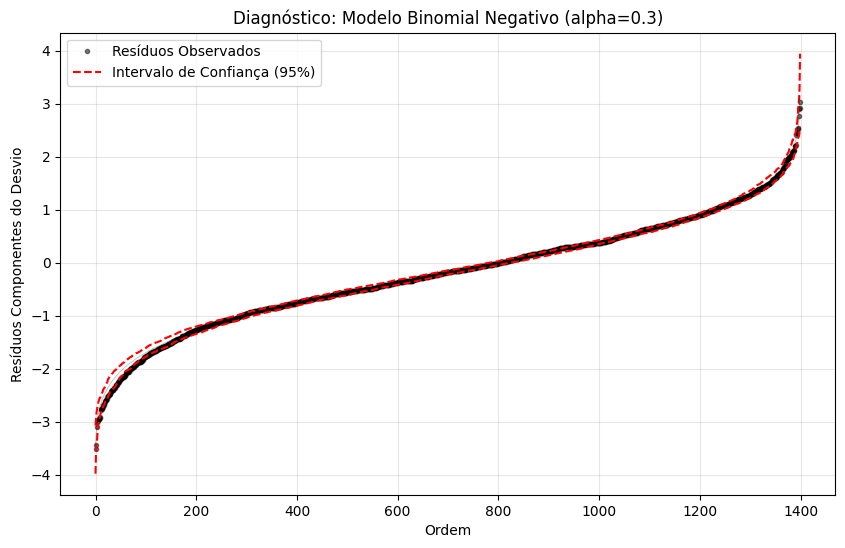

In [47]:
# 3. Gráfico de Envelope para Binomial Negativa
def envelope_negbin(fitted_model, title="Envelope - Binomial Negativa"):
    # Parâmetros
    X = fitted_model.model.exog
    # Garante que mu não seja zero ou negativo para evitar erros na simulação
    mu = np.clip(fitted_model.fittedvalues, 1e-5, None)
    alpha = fitted_model.family.alpha
    
    # Resíduos observados ordenados
    # Usamos resid_deviance que é o padrão para diagnóstico
    resid_obs = np.sort(fitted_model.resid_deviance)
    n = len(resid_obs)
    
    # Matriz para guardar as simulações
    n_simulacoes = 100
    sim_matrix = np.zeros((n_simulacoes, n))
    
    print("Gerando envelope simulado... (pode demorar alguns segundos)")
    
    # Conversão de parâmetros para o Numpy (n, p)
    # Na parametrização NB2: Var = mu + alpha * mu^2
    # No Numpy: n = 1/alpha, p = 1 / (1 + alpha*mu)
    n_numpy = 1 / alpha
    p_numpy = 1 / (1 + alpha * mu)
    
    for i in range(n_simulacoes):
        # Simula resposta
        y_sim = np.random.negative_binomial(n=n_numpy, p=p_numpy)
        
        # Ajusta modelo nos dados simulados
        model_sim = sm.GLM(
            y_sim, X, 
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()
        
        sim_matrix[i, :] = np.sort(model_sim.resid_deviance)
    
    # Bandas de confiança
    lower = np.percentile(sim_matrix, 2.5, axis=0)
    upper = np.percentile(sim_matrix, 97.5, axis=0)
    mean_sim = np.mean(sim_matrix, axis=0)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(resid_obs, 'k.', alpha=0.5, label='Resíduos Observados')
    plt.plot(lower, 'r--', label='Intervalo de Confiança (95%)')
    plt.plot(upper, 'r--')
    plt.plot(mean_sim, 'k-', alpha=0.3, linewidth=0.5)
    plt.title(title)
    plt.xlabel('Ordem')
    plt.ylabel('Resíduos Componentes do Desvio')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Gerar o gráfico
envelope_negbin(modelo_nb, "Diagnóstico: Modelo Binomial Negativo (alpha=0.3)")


O Modelo Binomial Negativo é o mais adequado para descrever o número de espirros neste estudo. Essa escolha justifica-se pela redução significativa do Deviance e, principalmente, pela adequação dos resíduos no gráfico de envelope, corrigindo a violação de suposição de equidispersão presente no modelo de Poisson.



# 5. Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [50]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


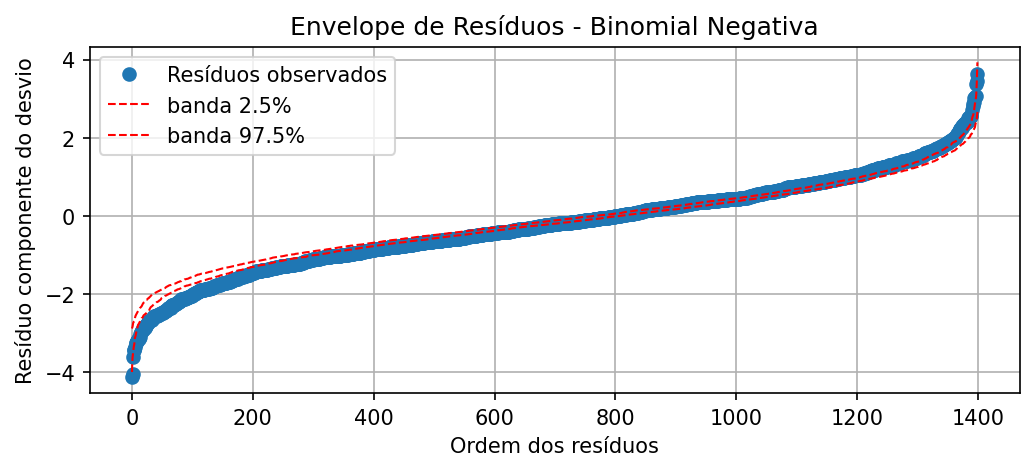

In [52]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [53]:
# 5. Estimativa dos Efeitos Marginais Médios (Average Marginal Effects - AME)
# at='overall' calcula a média dos efeitos para todas as observações
# method='dydx' calcula a derivada (mudança na resposta y dada mudança em x)

efeitos_marginais = results_nb.get_margeff(at='overall', method='dydx')
print(efeitos_marginais.summary())

         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]      8.0425      0.762     10.555      0.000       6.549       9.536
C(antihist)[T.1]   -13.9589      0.946    -14.753      0.000     -15.813     -12.104
C(smoker)[T.1]      14.4225      0.891     16.194      0.000      12.677      16.168
age                 -0.2589      0.025    -10.234      0.000      -0.308      -0.209
pollen               0.5835      0.021     27.985      0.000       0.543       0.624


Com base no Modelo Binomial Negativo, estimou-se o efeito marginal médio das variáveis de interesse na quantidade absoluta de espirros:

* **Consumo de Álcool (`alcohol`):**
    * **Efeito Marginal Estimado:** 8.04
    * **Interpretação:** Em média, o consumo de álcool está associado a um **aumento de aproximadamente 8 espirros** por dia em comparação aos indivíduos que não consomem, mantendo as demais características constantes.

* **Uso de Anti-histamínico (`antihist`):**
    * **Efeito Marginal Estimado:** -13.96
    * **Interpretação:** O uso de anti-histamínico está associado a uma **redução média de cerca de 14 espirros** por dia em comparação aos indivíduos que não utilizam o medicamento, *ceteris paribus*.

# 6. Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Divisão dos dados (80% Treino, 20% Teste)
# random_state garante que a divisão seja sempre a mesma para reproduzir os resultados
treino, teste = train_test_split(df, test_size=0.20, random_state=42)

print(f"Observações de Treino: {len(treino)}")
print(f"Observações de Teste: {len(teste)}")

Observações de Treino: 1120
Observações de Teste: 280


In [56]:
# 2. Ajustar os modelos APENAS nos dados de TREINO
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"
alpha_fixo = 0.3  # Valor para sneeze2

# Modelo Poisson (Treino)
model_pois_tr = smf.glm(formula=formula, data=treino, family=sm.families.Poisson()).fit()

# Modelo Binomial Negativo (Treino)
model_nb_tr = smf.glm(formula=formula, data=treino, family=sm.families.NegativeBinomial(alpha=alpha_fixo)).fit()

In [57]:
# 3. Fazer predições nos dados de TESTE
# O modelo usa as equações aprendidas no treino para chutar o resultado do teste
pred_pois = model_pois_tr.predict(teste)
pred_nb = model_nb_tr.predict(teste)

In [58]:
# 4. Calcular métricas de erro (Comparar Predição vs Realidade)
y_real = teste['nsneeze']

# EQM (Erro Quadrático Médio) - Penaliza muito erros grandes
eqm_pois = mean_squared_error(y_real, pred_pois)
eqm_nb = mean_squared_error(y_real, pred_nb)

# EAM (Erro Absoluto Médio) - Média do erro "em espirros"
eam_pois = mean_absolute_error(y_real, pred_pois)
eam_nb = mean_absolute_error(y_real, pred_nb)

print("\n--- Desempenho Preditivo (Conjunto de Teste) ---")
print(f"Poisson          -> EQM: {eqm_pois:.4f} | EAM: {eam_pois:.4f}")
print(f"Binomial Negativo-> EQM: {eqm_nb:.4f} | EAM: {eam_nb:.4f}")


--- Desempenho Preditivo (Conjunto de Teste) ---
Poisson          -> EQM: 614.2283 | EAM: 11.7818
Binomial Negativo-> EQM: 612.8212 | EAM: 11.6452


Os dados foram divididos em conjuntos de treinamento (80%) e teste (20%). Os modelos foram reajustados utilizando apenas o conjunto de treinamento e avaliados no conjunto de teste.

**Resultados Obtidos:**

| Modelo | EQM (Erro Quadrático Médio) | EAM (Erro Absoluto Médio) |
| :--- | :--- | :--- |
| **Poisson** | 614.2283 | 11.7818 |
| **Binomial Negativo** | **612.8212** | **11.6452** |

**Discussão:**

1.  **Melhor Desempenho Preditivo:**
    * Observando as métricas, o modelo **Binomial Negativo** apresentou os menores valores de erro tanto para o EQM quanto para o EAM, indicando uma capacidade preditiva superior fora da amostra.
    * Embora a diferença numérica seja sutil (pois ambos os modelos estimam a média de forma semelhante), a vantagem consistente do Binomial Negativo sugere que ele lida melhor com observações extremas e a variabilidade dos dados.

2.  **Consistência com Critérios de Ajuste:**
    * As conclusões baseadas no desempenho preditivo **coincidem** com os critérios de ajuste (Item 4).
    * Anteriormente, o modelo Binomial Negativo já havia demonstrado superioridade através do menor *Deviance* e do gráfico de envelope. O fato de ele também apresentar menor erro de previsão no conjunto de teste confirma que o modelo é robusto, não sofreu *overfitting* e é a escolha correta para representar o fenômeno.

# 7. Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [ ]:
pollen_baixo = df['pollen'].quantile(0.25)
pollen_alto = df['pollen'].quantile(0.75)

import pandas as pd

perfis = pd.DataFrame({
    'alcohol': [0, 1],       # Indivíduo A (0), Indivíduo B (1)
    'antihist': [1, 0],      # Indivíduo A (1), Indivíduo B (0)
    'smoker': [0, 1],        # Indivíduo A (0), Indivíduo B (1)
    'age': [30, 50],         # Indivíduo A (30), Indivíduo B (50)
    'pollen': [pollen_baixo, pollen_alto], # Baixo, Alto
    'Perfil': ['Indivíduo A (Saudável/Tratado)', 'Indivíduo B (Risco Alto)']
})

# Fazendo a previsão usando o modelo Binomial Negativo (ajuste_nb)
# O predict retorna a média esperada (lambda)
previsoes = ajuste_nb.predict(perfis)

perfis['Espirros Esperados'] = previsoes

print("--- Previsão do Número Esperado de Espirros ---")
print(perfis[['Perfil', 'alcohol', 'antihist', 'smoker', 'age', 'pollen', 'Espirros Esperados']])

--- Previsão do Número Esperado de Espirros ---
                           Perfil  alcohol  antihist  smoker  age     pollen  \
0  Indivíduo A (Saudável/Tratado)        0         1       0   30  37.643987   
1        Indivíduo B (Risco Alto)        1         0       1   50  73.818962   

   Espirros Esperados  
0            4.632722  
1           45.094729  


Utilizando o modelo Binomial Negativo ajustado, calcularam-se as previsões do número esperado de espirros para dois perfis distintos de pacientes:

**1. Indivíduo A (Perfil de Baixo Risco/Tratado):**
* **Características:** Não consome álcool, usa anti-histamínico, não fuma, 30 anos, exposto a baixa concentração de pólen.
* **Número Esperado de Espirros:** **4.63** (aprox. 5 espirros).
* **Análise:** Este indivíduo apresenta um cenário controlado, beneficiando-se fortemente do uso da medicação e da ausência de fatores agravantes (álcool e fumo).

**2. Indivíduo B (Perfil de Alto Risco):**
* **Características:** Consome álcool, não usa anti-histamínico, fuma, 50 anos, exposto a alta concentração de pólen.
* **Número Esperado de Espirros:** **45.09** (aprox. 45 espirros).
* **Análise:** Apesar de ser mais velho (fator que isoladamente reduziria levemente a contagem), a combinação de fatores de risco (álcool e tabagismo) aliada à falta de medicação e alta exposição ao pólen eleva drasticamente a previsão.

**Conclusão Final:**
O modelo prevê que o **Indivíduo B espirrará quase 10 vezes mais** que o Indivíduo A, ilustrando o impacto cumulativo das covariáveis analisadas na saúde do paciente com rinite.
